### Import library yang dibutuhkan

In [1]:
from nltk.probability import FreqDist
from nltk.corpus import stopwords

import pandas as pd
import numpy

import string, re

In [ ]:
### Load stopwords Bahasa Indonesia

In [3]:
stopwords_id = set(stopwords.words('indonesian'))

### Buat fungsi untuk membuat plot frekuensi kemunculan kata

In [4]:
def count_word_freq(csv_file):
    # get sentence_text from csv
    df = pd.read_csv(csv_file)
    docs = df['sentence_text'].tolist()
    
    # build a word tokens list
    docs = [re.sub(r"\d+", "", sent) for sent in docs]
    docs = [sent.lower() for sent in docs]
    docs = [sent.translate(sent.maketrans("","", string.punctuation)).strip() for sent in docs]
    docs = [re.sub('\s+',' ', sent) for sent in docs]

    freqTokens = [sent.split() for sent in docs]
    freqTokens = list(numpy.concatenate(freqTokens).flat) # flatten list
    freqTokens = [word for word in freqTokens if len(word) >= 3 and not word in stopwords_id] # remove stopwords
    freqTokens = FreqDist(freqTokens)
    
    dfTokens = pd.DataFrame.from_dict(freqTokens, orient='index')
    dfTokens.columns = ['Frequency']
    dfTokens.index.name = 'Key'
    dfTokens = dfTokens.sort_values('Frequency', ascending=False)
    
    dfTokens.iloc[0:30].plot(kind='bar')

### Hitung kemunculan huruf dari seluruh label

#### F1

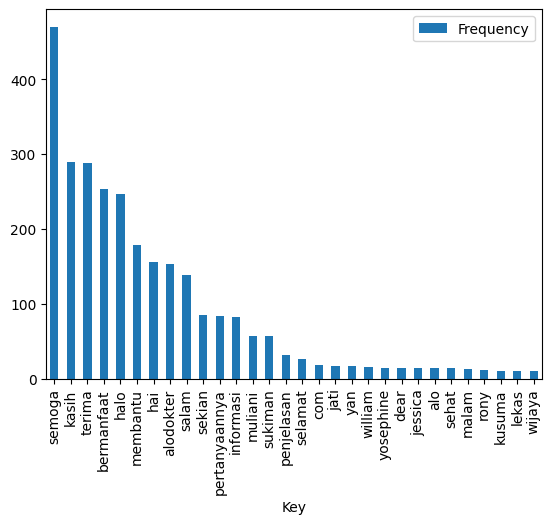

In [5]:
count_word_freq('label_out/label_F1.csv')

In [6]:
f1_wordlist = [
    'semoga',
    'kasih',
    'terima',
    'pagi',
    'terimakasih',
    'halo',
    'hai',
    'demikian',
    'salam',
    'sekian',
    'dear',
    'malam',
    'alo'
]

#### F2

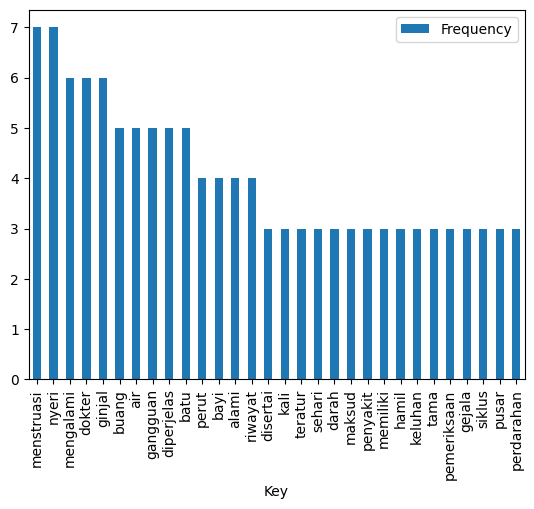

In [7]:
count_word_freq('label_out/label_F2.csv')

#### F3

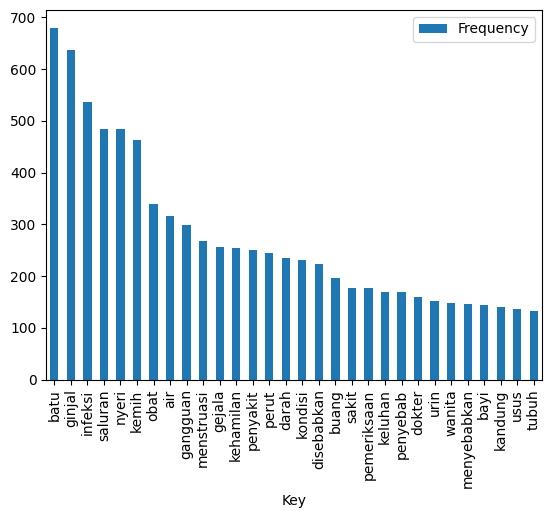

In [8]:
count_word_freq('label_out/label_F3.csv')

#### F4

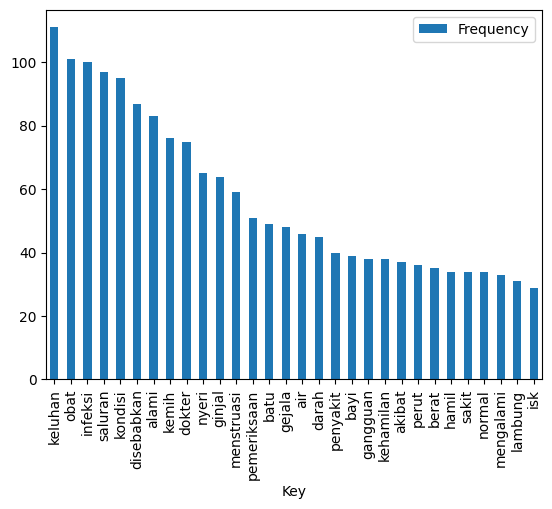

In [9]:
count_word_freq('label_out/label_F4.csv')

#### F5

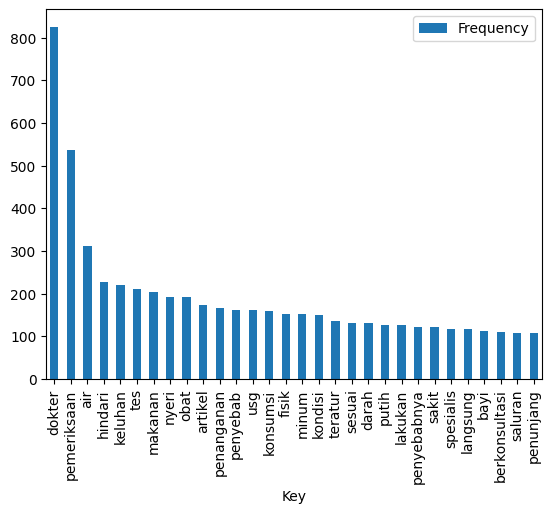

In [10]:
count_word_freq('label_out/label_F5.csv')

#### F6

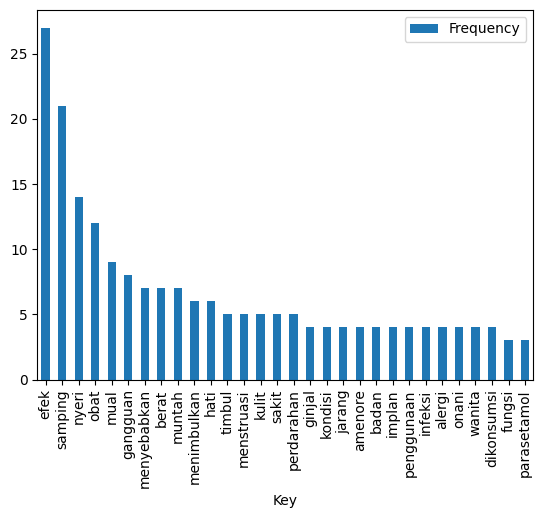

In [11]:
count_word_freq('label_out/label_F6.csv')